<a href="https://colab.research.google.com/github/Madhusudan2005/ElevateLabs-Task5/blob/main/ElevateLabs_Task5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

--- 2. Data Loading & Exploration ---
Dataset 'heart.csv' loaded successfully.
First 5 rows of the dataset:
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0  

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Columns: 14 entries, age to target
dtypes: float64(1), int64(13)
memory usage: 112.2 KB

Checking for missing values:
age         0
sex         0
cp          0
trestbps    0
chol      

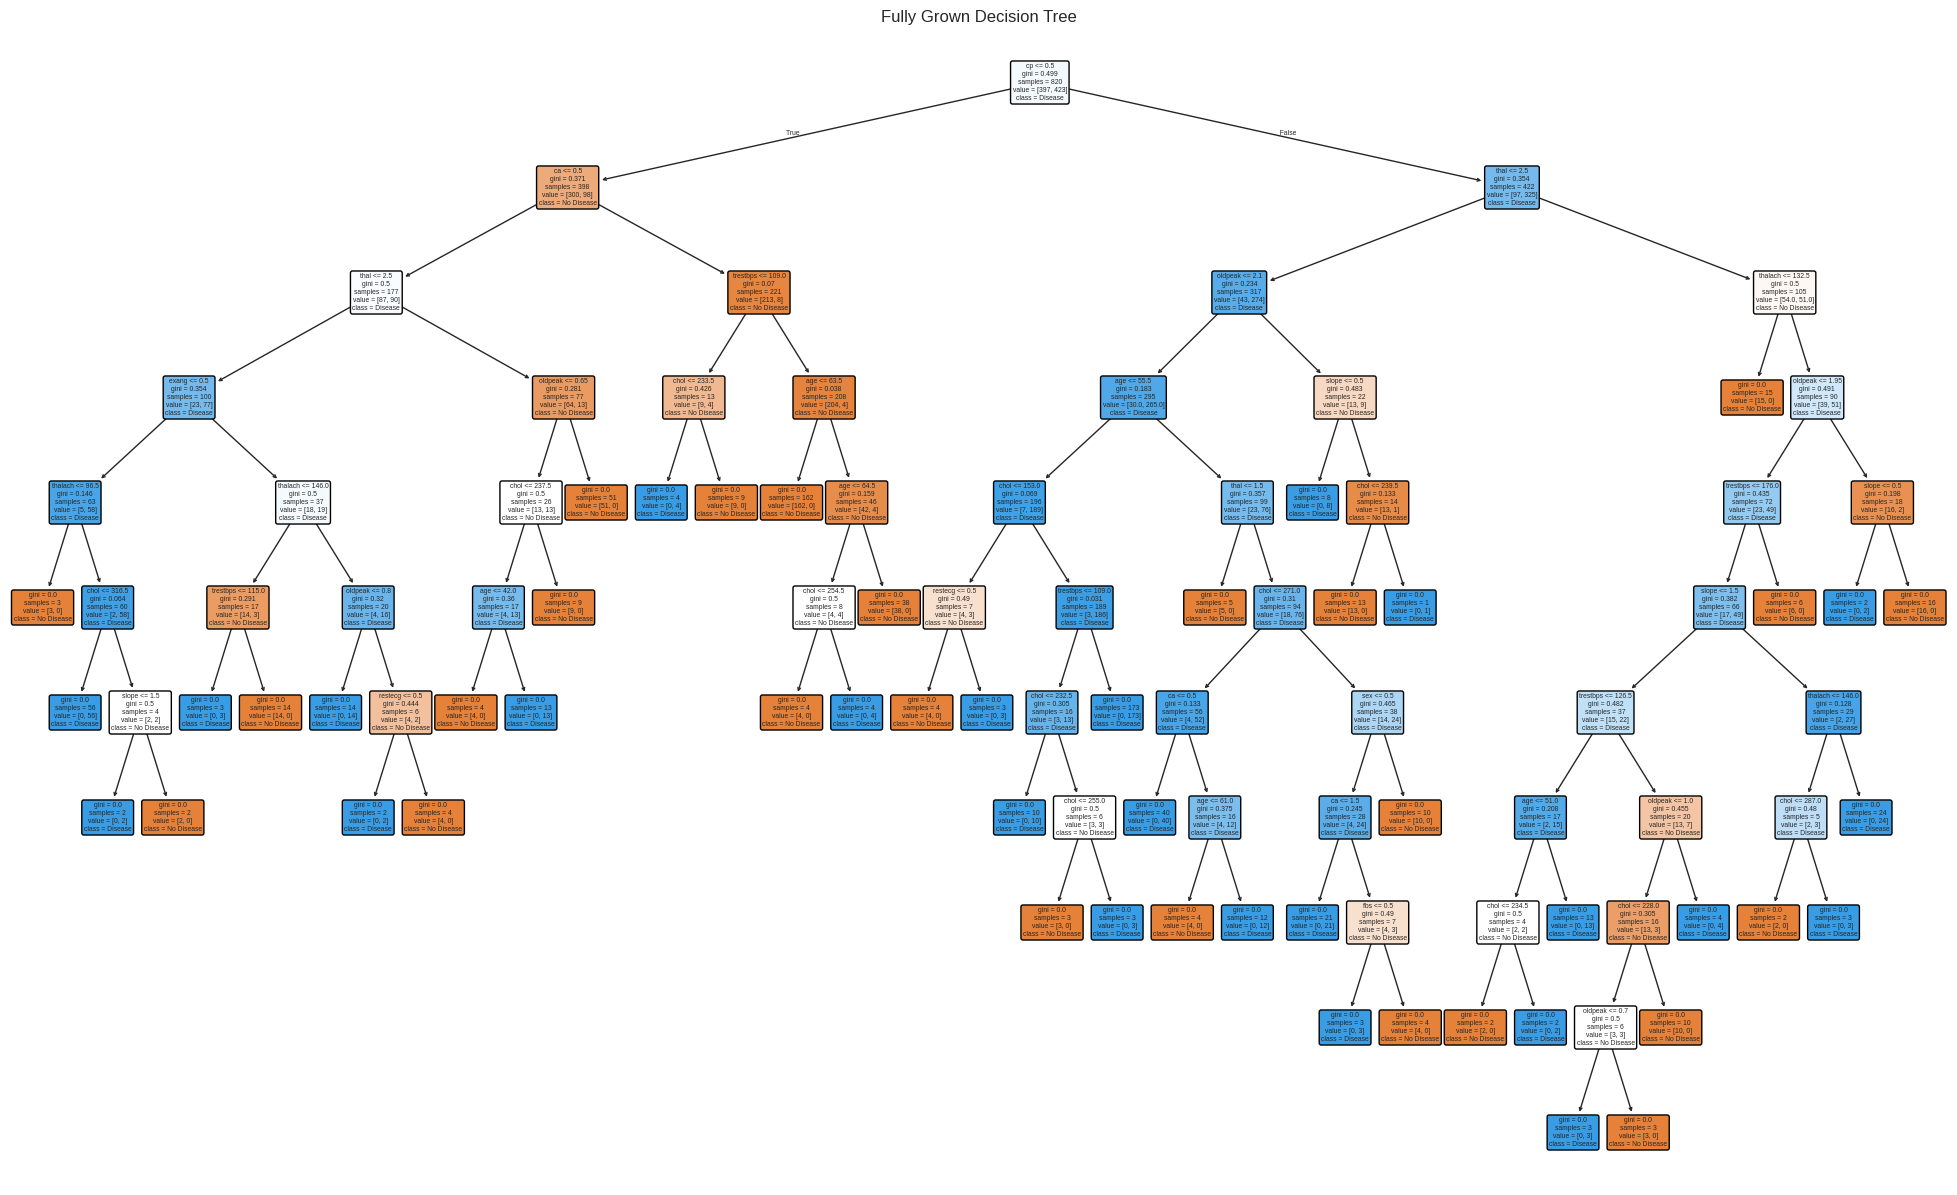

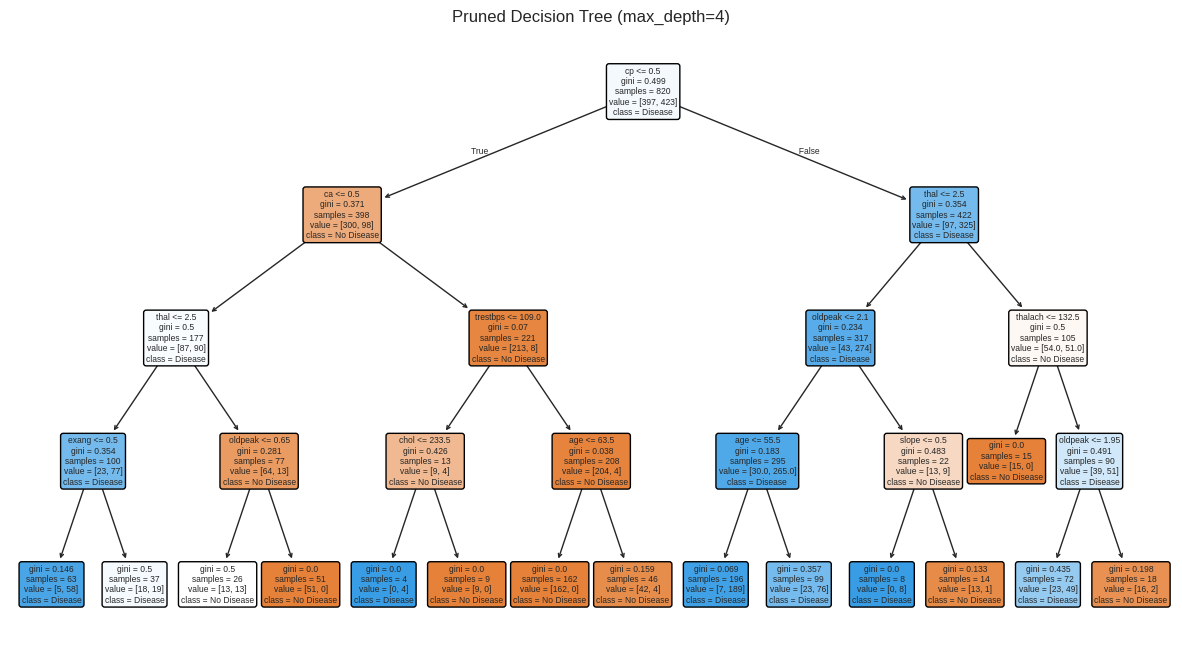

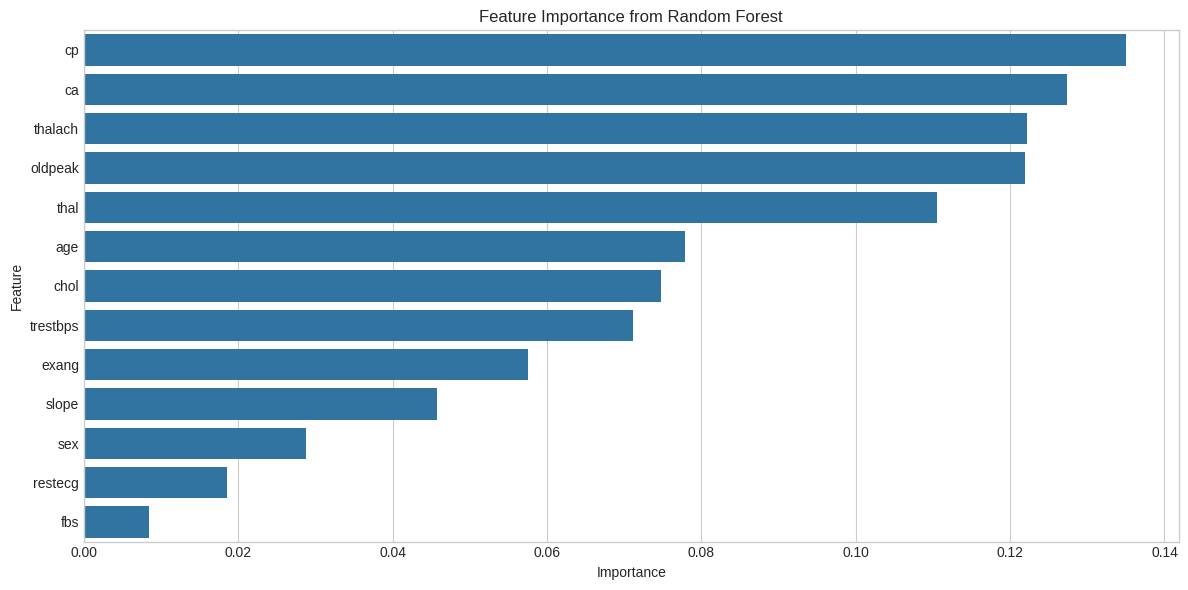

In [6]:
# Step 1: Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Set a style for plots
plt.style.use('seaborn-v0_8-whitegrid')

# Step 2: Load and Explore the Dataset
try:
    # Load the user-uploaded dataset
    df = pd.read_csv('heart.csv')
    print("--- 2. Data Loading & Exploration ---")
    print("Dataset 'heart.csv' loaded successfully.")
    print("First 5 rows of the dataset:")
    print(df.head())
    print("\nDataset Info:")
    df.info(verbose=False) # Using verbose=False for a cleaner summary
    print("\nChecking for missing values:")
    print(df.isnull().sum())


    # Step 3: Prepare Data for Modeling
    print("\n--- 3. Data Preparation ---")
    X = df.drop('target', axis=1)
    y = df['target']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    print(f"Data split into training and testing sets.")
    print(f"X_train shape: {X_train.shape}, X_test shape: {X_test.shape}")


    # Task 1: Train and Visualize a Decision Tree
    print("\n--- Task 1: Fully Grown Decision Tree ---")
    dt_full = DecisionTreeClassifier(random_state=42)
    dt_full.fit(X_train, y_train)
    plt.figure(figsize=(25, 15))
    plot_tree(dt_full, feature_names=X.columns, class_names=['No Disease', 'Disease'], filled=True, rounded=True)
    plt.title("Fully Grown Decision Tree")
    plt.savefig("full_decision_tree.png")
    print("Generated visualization for the fully grown tree: 'full_decision_tree.png'")


    # Task 2: Analyze Overfitting and Control Tree Depth
    print("\n--- Task 2: Overfitting Analysis & Pruning ---")
    y_pred_train_full = dt_full.predict(X_train)
    y_pred_test_full = dt_full.predict(X_test)
    accuracy_train_full = accuracy_score(y_train, y_pred_train_full)
    accuracy_test_full = accuracy_score(y_test, y_pred_test_full)
    print(f"Full Tree Training Accuracy: {accuracy_train_full:.4f}")
    print(f"Full Tree Testing Accuracy:  {accuracy_test_full:.4f}")

    dt_pruned = DecisionTreeClassifier(max_depth=4, random_state=42)
    dt_pruned.fit(X_train, y_train)
    plt.figure(figsize=(15, 8))
    plot_tree(dt_pruned, feature_names=X.columns, class_names=['No Disease', 'Disease'], filled=True, rounded=True)
    plt.title("Pruned Decision Tree (max_depth=4)")
    plt.savefig("pruned_decision_tree.png")
    print("Generated visualization for the pruned tree: 'pruned_decision_tree.png'")

    y_pred_train_pruned = dt_pruned.predict(X_train)
    y_pred_test_pruned = dt_pruned.predict(X_test)
    accuracy_train_pruned = accuracy_score(y_train, y_pred_train_pruned)
    accuracy_test_pruned = accuracy_score(y_test, y_pred_test_pruned)
    print(f"\nPruned Tree Training Accuracy: {accuracy_train_pruned:.4f}")
    print(f"Pruned Tree Testing Accuracy:  {accuracy_test_pruned:.4f}")


    # Task 3: Train a Random Forest and Compare Accuracy
    print("\n--- Task 3: Random Forest & Accuracy Comparison ---")
    rf = RandomForestClassifier(n_estimators=100, random_state=42)
    rf.fit(X_train, y_train)
    y_pred_rf = rf.predict(X_test)
    accuracy_rf = accuracy_score(y_test, y_pred_rf)
    print(f"Fully Grown Decision Tree (Test): {accuracy_test_full:.4f}")
    print(f"Pruned Decision Tree (Test):    {accuracy_test_pruned:.4f}")
    print(f"Random Forest (Test):           {accuracy_rf:.4f}")


    # Task 4: Interpret Feature Importances
    print("\n--- Task 4: Feature Importance ---")
    importances = rf.feature_importances_
    feature_names = X.columns
    feature_importance_df = pd.DataFrame({'feature': feature_names, 'importance': importances})
    feature_importance_df = feature_importance_df.sort_values('importance', ascending=False)
    plt.figure(figsize=(12, 6))
    sns.barplot(x='importance', y='feature', data=feature_importance_df)
    plt.title('Feature Importance from Random Forest')
    plt.xlabel('Importance')
    plt.ylabel('Feature')
    plt.tight_layout()
    plt.savefig("feature_importance.png")
    print("Generated plot for feature importance: 'feature_importance.png'")


    # Task 5: Evaluate Using Cross-Validation
    print("\n--- Task 5: Cross-Validation ---")
    cv_scores = cross_val_score(rf, X, y, cv=5)
    print(f"Scores for each fold: {cv_scores}")
    print(f"Average CV Score: {cv_scores.mean():.4f}")
    print(f"Standard Deviation of CV Scores: {cv_scores.std():.4f}")

except FileNotFoundError:
    print("The file 'heart.csv' was not found. Please upload it to your Colab session.")
except Exception as e:
    print(f"An error occurred: {e}")